# Visualize a complexheatmap for NF1 morphology features

In [1]:
suppressPackageStartupMessages(library(ComplexHeatmap))
suppressPackageStartupMessages(library(dplyr))

In [2]:
# Set paths and constants
input_data_dir <- file.path("..", "..", "..", "4_processing_features", "data")
output_figure_dir <- "figures"

cp_heatmap_file_noext <- file.path(output_figure_dir, "cp_complex_heatmap")
dp_heatmap_file_noext <- file.path(output_figure_dir, "dp_complex_heatmap")

In [3]:
# Set heatmap colors
well_cols = c(
    "C6" = "#E1DAAE",
    "C7" = "#FF934F",
    "D6" = "#CC2D35",
    "D7" = "#058ED9",
    "E6" = "#848FA2",
    "E7" = "#2D3142",
    "F6" = "#FFC857",
    "F7" = "#5f7a12"
)
genotype_cols = c(
    "Null" = "#785EF0",
    "WT" = "#DC267F"
)

## Create a heatmap for CP features

In [4]:
# Load data
cp_file <- file.path(input_data_dir, "nf1_sc_norm_fs_cellprofiler.csv.gz")

cp_df <- readr::read_csv(
    cp_file,
    col_types = readr::cols(
        .default="d",
        Metadata_WellRow="c",
        Metadata_WellCol="c",
        Metadata_Well="c",
        Metadata_gene_name="c",
        Metadata_genotype="c"
    )
) %>% dplyr::select(-...1)  # Drop index col

print(dim(cp_df))
head(cp_df, 3)

New names:
• `` -> `...1`


[1] 149 444


Metadata_WellRow,Metadata_WellCol,Metadata_number_of_singlecells,Metadata_gene_name,Metadata_genotype,Metadata_ImageNumber,Metadata_Plate,Metadata_Well,Metadata_Cytoplasm_Parent_Cells,Metadata_Cytoplasm_Parent_OrigNuclei,⋯,Nuclei_Texture_InfoMeas1_RFP_3_03_256,Nuclei_Texture_InfoMeas2_GFP_3_00_256,Nuclei_Texture_InfoMeas2_RFP_3_00_256,Nuclei_Texture_InfoMeas2_RFP_3_01_256,Nuclei_Texture_InfoMeas2_RFP_3_02_256,Nuclei_Texture_InfoMeas2_RFP_3_03_256,Nuclei_Texture_InverseDifferenceMoment_GFP_3_03_256,Nuclei_Texture_InverseDifferenceMoment_RFP_3_00_256,Nuclei_Texture_InverseDifferenceMoment_RFP_3_03_256,Nuclei_Texture_SumVariance_RFP_3_01_256
<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
C,6,12,NF1,WT,1,1,C6,1,4,⋯,-1.1974882,0.2890908,0.9694556,1.1313846,1.3036800,1.4169167,-0.07943840,-2.315521,-1.6932101,2.8811992
C,6,12,NF1,WT,1,1,C6,2,5,⋯,0.1884135,0.6116658,0.4819536,0.7481841,0.7502767,0.5110832,-0.06595751,-1.460076,-1.4275789,0.3041214
C,6,12,NF1,WT,1,1,C6,3,7,⋯,-1.0872581,0.8438834,-0.2148870,0.2382992,0.4828323,1.2649497,-0.06974899,-1.841707,-0.7983681,0.2572839


In [5]:
# Split metadata and feature data
cp_metadata_df <- cp_df %>% dplyr::select(tidyr::starts_with("Metadata"))
cp_meta_cols <- colnames(cp_metadata_df)
cp_df <- cp_df %>% dplyr::select(-!!cp_meta_cols)

In [6]:
# Calculate correlation matrix from feature data
cp_cor_matrix <- t(cp_df) %>% cor()

print(dim(cp_cor_matrix))
head(cp_cor_matrix, 3)

[1] 149 149


1.0000000,0.2661384,0.5965053,0.4107231,0.318710810,0.3168967,0.3869512,0.1949328,0.3741039,0.05004489,⋯,-0.1599065,0.11078469,-0.1402647,-0.15216344,-0.2979386,0.08649041,-0.04860359,-0.2748454,-0.2668282,-0.1281369
0.2661384,1.0000000,0.3689997,0.4379076,0.008404949,0.2406374,0.3251443,0.4476050,0.4485464,0.13698028,⋯,-0.1384229,-0.14400489,-0.2408296,-0.28383620,-0.1465664,-0.01982131,-0.19081946,-0.1522353,-0.1281615,-0.1865126
0.5965053,0.3689997,1.0000000,0.5236090,0.056092523,0.3800718,0.2653718,0.4315614,0.4083933,0.22402904,⋯,-0.1104515,0.03484565,-0.2673418,-0.04658087,-0.1798934,-0.07095712,-0.21248715,-0.2455467,-0.3015115,-0.1116887


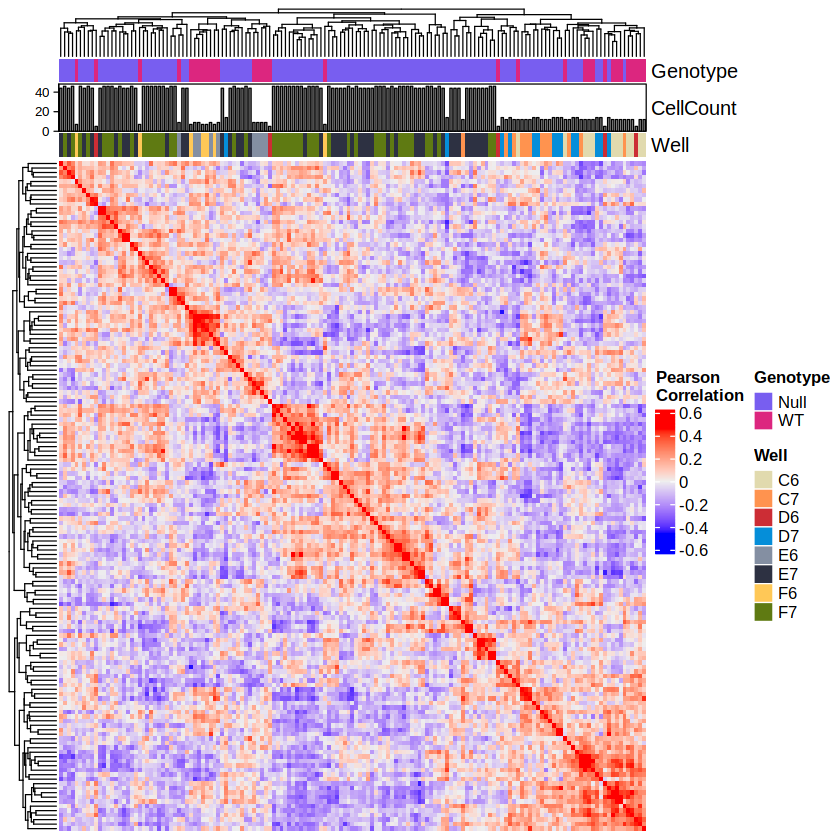

In [7]:
ht <- Heatmap(
    cp_cor_matrix,
    name = "Pearson\nCorrelation",
    column_dend_side = "top",
    
    clustering_method_columns = "average",
    clustering_method_rows = "average",
    
    top_annotation = HeatmapAnnotation(
        Genotype = cp_metadata_df$Metadata_genotype,
        CellCount = anno_barplot(
            cp_metadata_df$Metadata_number_of_singlecells,
            height = unit(1, "cm")
        ),
        Well = cp_metadata_df$Metadata_Well,
        
        col = list(
            Genotype = genotype_cols,
            Well = well_cols
        )
    )
)

draw(ht)

In [8]:
# Save heatmap to file
pdf(paste0(cp_heatmap_file_noext, ".pdf"))
draw(ht)
dev.off()

png(paste0(cp_heatmap_file_noext, ".png"), width = 6.5, height = 6, units = "in", res = 500)
draw(ht)
dev.off()

png 
  2

png 
  2

## Create a heatmap for DeepProfiler features

In [9]:
# Load data
dp_file <- file.path(input_data_dir, "nf1_sc_norm_fs_deepprofiler_nuc.csv.gz")

dp_df <- readr::read_csv(
    dp_file,
    col_types = readr::cols(
        .default="d",
        Metadata_Plate="c",
        Metadata_Well="c",
        Metadata_Site="c",
        Metadata_Plate_Map_Name="c",
        Metadata_DNA="c",
        Metadata_ER="c",
        Metadata_Actin="c",
        Metadata_Genotype="c",
        Metadata_Genotype_Replicate="c",
        Metadata_Model="c"
    )
)

print(dim(dp_df))
head(dp_df, 3)

[1]  257 3837


Location_Center_X,Location_Center_Y,Metadata_Plate,Metadata_Well,Metadata_Site,Metadata_Plate_Map_Name,Metadata_DNA,Metadata_ER,Metadata_Actin,Metadata_Genotype,⋯,efficientnet_3830,efficientnet_3831,efficientnet_3832,efficientnet_3833,efficientnet_3834,efficientnet_3835,efficientnet_3836,efficientnet_3837,efficientnet_3838,efficientnet_3839
<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
652.8684,760.5526,1,D6,3,1_D6_3,../../../../1_preprocessing_data/Corrected_Images/D6_01_1_3_DAPI_001_IllumCorrect.tif,../../../../1_preprocessing_data/Corrected_Images/D6_01_2_3_GFP_001_IllumCorrect.tif,../../../../1_preprocessing_data/Corrected_Images/D6_01_3_3_RFP_001_IllumCorrect.tif,WT,⋯,-0.5142006,0.4780987,0.4841046,-0.2121633,-0.5725815,-0.2390698,0.9079577,0.21926075,0.3111316,-0.2888836
1015.8985,209.1624,1,F6,2,1_F6_2,../../../../1_preprocessing_data/Corrected_Images/F6_01_1_2_DAPI_001_IllumCorrect.tif,../../../../1_preprocessing_data/Corrected_Images/F6_01_2_2_GFP_001_IllumCorrect.tif,../../../../1_preprocessing_data/Corrected_Images/F6_01_3_2_RFP_001_IllumCorrect.tif,WT,⋯,-0.2501382,-0.7401107,-0.1905048,-0.6903121,-0.8624256,4.0392675,-1.5328612,-1.38283280,-0.3366425,0.8946688
387.2028,238.8538,1,F6,2,1_F6_2,../../../../1_preprocessing_data/Corrected_Images/F6_01_1_2_DAPI_001_IllumCorrect.tif,../../../../1_preprocessing_data/Corrected_Images/F6_01_2_2_GFP_001_IllumCorrect.tif,../../../../1_preprocessing_data/Corrected_Images/F6_01_3_2_RFP_001_IllumCorrect.tif,WT,⋯,-0.3587300,-0.1833523,1.2521746,-0.8241032,-0.1857198,-0.3806024,0.4642813,0.01987594,0.7933338,1.4282179


In [10]:
# Split metadata and feature data
dp_metadata_df <- dp_df %>% dplyr::select(tidyr::starts_with("Metadata"))
dp_meta_cols <- colnames(dp_metadata_df)
dp_meta_cols <- c(dp_meta_cols, c("Location_Center_X", "Location_Center_Y"))

dp_df <- dp_df %>% dplyr::select(-!!dp_meta_cols)

In [11]:
# Calculate number of single cells per well in DP data
dp_metadata_df <- dp_metadata_df %>%
    dplyr::group_by(Metadata_Well) %>%
    dplyr::add_tally(name = "Metadata_cell_count")

In [12]:
# Calculate correlation matrix from feature data
dp_cor_matrix <- t(dp_df) %>% cor()

print(dim(dp_cor_matrix))
head(dp_cor_matrix, 3)

[1] 257 257


1.00000000,-0.120801061,0.047865726,-0.04378985,0.01718652,0.01002778,-0.04713047,0.13249416,-0.12084135,0.11632504,⋯,0.02019118,-0.1330208,0.04131064,-0.1625462,-0.12881378,-0.15412949,-0.04708668,-0.08434615,-0.08754274,-0.005096813
-0.12080106,1.000000000,0.000958072,0.01718501,-0.11775003,0.14059758,-0.02511266,-0.12750441,-0.03055102,-0.13124129,⋯,0.10258064,0.1760926,0.07182161,0.1377017,0.22529376,0.04392165,0.10795778,0.06657645,-0.09062094,-0.095034019
0.04786573,0.000958072,1.000000000,0.07959063,0.20605412,0.33020378,-0.13285515,0.09212552,-0.21731024,0.02481587,⋯,-0.10042755,-0.1660432,-0.08691358,-0.1024060,-0.05491715,-0.07889841,-0.08330133,-0.04614428,0.06555544,0.091070145


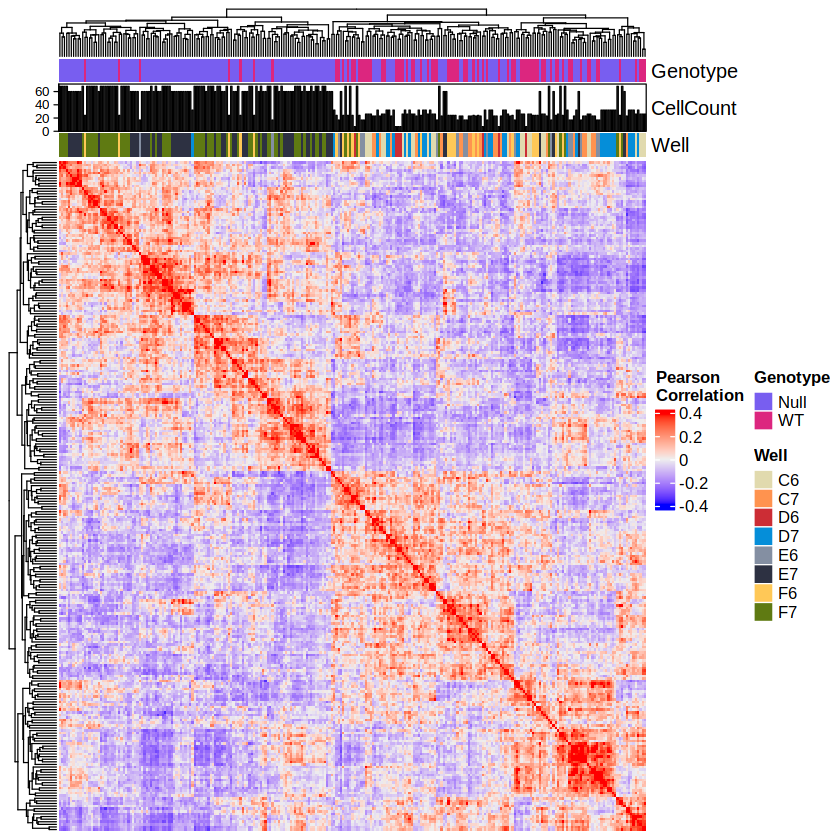

In [13]:
ht <- Heatmap(
    dp_cor_matrix,
    name = "Pearson\nCorrelation",
    column_dend_side = "top",
    
    clustering_method_columns = "average",
    clustering_method_rows = "average",
    
    top_annotation = HeatmapAnnotation(
        Genotype = dp_metadata_df$Metadata_Genotype,
        CellCount = anno_barplot(
            dp_metadata_df$Metadata_cell_count,
            height = unit(1, "cm")
        ),
        Well = dp_metadata_df$Metadata_Well,
        
        col = list(
            Genotype = genotype_cols,
            Well = well_cols
        )
    )
)

draw(ht)

In [14]:
# Save heatmap to file
pdf(paste0(dp_heatmap_file_noext, ".pdf"))
draw(ht)
dev.off()

png(paste0(dp_heatmap_file_noext, ".png"), width = 6.5, height = 6, units = "in", res = 500)
draw(ht)
dev.off()

png 
  2

png 
  2